<img align="right" src="../../additional_data/banner_siegel.png" style="width:1100px;">

#  Process Spatial Vector Data in Python : Pandas and Geopandas

* [**Sign up to the JupyterHub**](https://www.phenocube.org/) to run this notebook interactively from your browser
* **Compatibility:** Notebook currently compatible with the Open Data Cube environments of the University of Wuerzburg
* **Prerequisites**: we assume that readers have a basic understanding of spatial vector data

## Background

The two basic data types we encounter when processing remote sensing data are **spatial raster data** and **spatial vector data**. In addition to the previous tutorials we presented concerning datacube and raster data processing, in this notebook however, we would like to introduce spatial vector data processing in Python to our readers.

Assuming that our readers already have an understanding of spatial vector data, we won't start with illustrating terms and concepts, but focus on presenting how to process it using Python.

Let's start!:)

## Description

This notebook contains the following sections:

* **Overview of Data Structure** 
<br>

* **Manipulating GeoDataFrames**
<br>

* **Basic Processing on Spatial Vector Data**
    * Reproject Spatial Vector Data
    * Calculate perimeters and areas of polygons
    * Add the calculated parameters to GeoDataFrame

<br>

* how to read spatial vector data into Python?
* how to reproject spatial vector data?
* how to calculate perimeters and areas of geometries?
* how to modify attribute table?

## Overview of Data Structure

**`pandas`** is the standard package in Python to work on a ***DataFrame***. Each column of the DataFrame is a ***pandas series***, which is substantially a one-dimensional array.

**`geopandas`** is the package we are introducing for processing spatial vector data. It reads any spatial vector data as a ***GeoDataFrame*** that is just like a standard pandas DataFrame, but with an additional column called *`['geometry']`*.

The column *`['geometry']`* is, instead of a pandas series, a ***Geoseries***, which is substantially also a one-dimensional array. Each entry in this series is a set of coordinates depicting the shape(s) of one or multiple geometric objects.

There are three basic classes of geometric objects:
* Point / Multipoints
* Line / Multilines
* Polygon / Multipolygons

In summary, the structure of a `GeoDataFrame` generally looks like as follows:

***
* Column_A *(`pandas series`)*
* Column_B *(`pandas series`)*
* ...
* Column "geometry" *(`geoseries`)*
    * (e.g.) Multipolygon_1 *(`shapely.geometry`)*
        * polygon_1a
        * polygon_1b
    * (e.g.) Multipolygon_2 *(`shapely.geometry`)*
        * polygon_2a
        * polygon_2b
***

* *Note: **`shapely`** is the package that `geopandas` relys on to handle geometric objects, so the data types are displayed as `shapely.geometry.polygon/multipolygon/etc.`.*
* *Note: all entries in a GeoSeries need not be of the same geometric type, although certain export operations will fail if this is not the case.*

## Manipulating GeoDataFrames
<br>

### Read Spatial Vector Data

To read local spatial vector data into Python, you just need to define the path to your data and use function **`geopandas.read_file()`**.

**`geopandas`** supports various formats of geospatial vector data including ArcGIS Shapefile(`.shp`), Geopackage(`.gpkg`), Geojson(`.geojson`) etc.
The sample data used in this notebook is a `.gpkg` file of some river basins in South Africa. You may download this data [here]() or you may also use you own vector data.

* *In case you have confusions concerning file path, you may refer to one of our previous [tutorials](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_python/01_manage_files_directories_and_paths.ipynb).*
<br>
* *There are also methods of reading vector data through URLs; if you are interested in this, you may refer to [here](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/spatial-data-using-apis/) and [here](https://gis.stackexchange.com/questions/225586/reading-raw-data-into-geopandas).*

In [2]:
# Packages we need
import os
import geopandas as gpd
from shapely.geometry import Polygon, Point, MultiPolygon

In [5]:
my_path = "C:/EAGLE/internship_job/Hiwi/DataCube/eo2cube_notebooks/get_started/intro_to_python/sample_data/basin_saf.gpkg"
basin = gpd.read_file(my_path)
type(basin)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

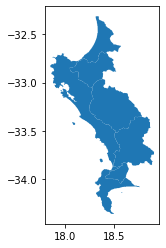

In [4]:
basin.plot()

### Check out Attributes of GeoDataFrame

* ***The first / last 5 records*** --- ***`<gdf>.head()` & `<gdf>.tail()`***

In [6]:
# Check the first 5 records
basin.head()

# Check the last 5 records
#basin.tail()

,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,ENDO,COAST,ORDER,SORT,geometry
0,1080015240,0,1080015240,1080015240,0.0,0.0,638.2,638.2,12601077,0,1,0,6770,"MULTIPOLYGON (((18.58611 -34.14167, 18.57999 -..."
1,1080015260,0,1080015260,1080015260,0.0,0.0,259.3,259.5,12601078,0,0,1,6771,"MULTIPOLYGON (((18.47500 -33.91667, 18.47500 -..."
2,1080015270,0,1080015270,1080015270,0.0,0.0,23.6,23.7,12601079,0,1,0,6772,"MULTIPOLYGON (((18.50000 -33.91250, 18.49779 -..."
3,1080015280,0,1080015280,1080015280,0.0,0.0,1488.2,1488.3,12601080,0,0,1,6773,"MULTIPOLYGON (((18.89167 -33.85000, 18.87696 -..."
4,1080015290,0,1080015290,1080015290,0.0,0.0,2120.1,2120.1,12601090,0,1,0,6774,"MULTIPOLYGON (((18.37361 -33.82500, 18.36762 -..."


* ***Check Info*** --- ***`<gdf>.info()`***

In [7]:
basin.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   HYBAS_ID   8 non-null      int64   
 1   NEXT_DOWN  8 non-null      int64   
 2   NEXT_SINK  8 non-null      int64   
 3   MAIN_BAS   8 non-null      int64   
 4   DIST_SINK  8 non-null      float64 
 5   DIST_MAIN  8 non-null      float64 
 6   SUB_AREA   8 non-null      float64 
 7   UP_AREA    8 non-null      float64 
 8   PFAF_ID    8 non-null      int64   
 9   ENDO       8 non-null      int64   
 10  COAST      8 non-null      int64   
 11  ORDER      8 non-null      int64   
 12  SORT       8 non-null      int64   
 13  geometry   8 non-null      geometry
dtypes: float64(4), geometry(1), int64(9)
memory usage: 1.0 KB


* ***Column Names*** --- ***`<gdf>.columns`***

In [9]:
basin.columns

Index(['HYBAS_ID', 'NEXT_DOWN', 'NEXT_SINK', 'MAIN_BAS', 'DIST_SINK',
       'DIST_MAIN', 'SUB_AREA', 'UP_AREA', 'PFAF_ID', 'ENDO', 'COAST', 'ORDER',
       'SORT', 'geometry'],
      dtype='object')

* ***Check Shape*** --- ***`<gdf>.shape`*** <br>
The output is the (number of rows, number of columns) of the GeoDataFrame

In [10]:
basin.shape

(8, 14)

### Get Summary Statistics of GeoDataFrame

* ***`<gdf>.describe()`***
* ***`<gdf>.median()`***
* ***`<gdf>.sum()`***
* ...

In [21]:
basin.describe()

,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,ENDO,COAST,ORDER,SORT
count,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000,8.000000,8.000000,8.000000,8.000000e+00,8.0,8.000000,8.000000,8.000000
mean,1.080220e+09,1.350019e+08,1.080015e+09,1.080015e+09,4.637500,4.637500,986.087500,1851.312500,1.260155e+07,0.0,0.500000,0.625000,6774.500000
std,5.798437e+05,3.818431e+08,6.654751e+01,6.654751e+01,13.116831,13.116831,733.854805,2511.916547,7.185255e+02,0.0,0.534522,0.744024,4.440077
min,1.080015e+09,0.000000e+00,1.080015e+09,1.080015e+09,0.000000,0.000000,23.600000,23.700000,1.260108e+07,0.0,0.000000,0.000000,6770.000000
25%,1.080015e+09,0.000000e+00,1.080015e+09,1.080015e+09,0.000000,0.000000,543.475000,543.525000,1.260108e+07,0.0,0.000000,0.000000,6771.750000
50%,1.080015e+09,0.000000e+00,1.080015e+09,1.080015e+09,0.000000,0.000000,805.550000,1111.450000,1.260108e+07,0.0,0.500000,0.500000,6773.500000
75%,1.080015e+09,0.000000e+00,1.080015e+09,1.080015e+09,0.000000,0.000000,1553.200000,1841.250000,1.260200e+07,0.0,1.000000,1.000000,6775.500000
max,1.081655e+09,1.080015e+09,1.080015e+09,1.080015e+09,37.100000,37.100000,2120.100000,7797.800000,1.260300e+07,0.0,1.000000,2.000000,6784.000000


* ***You may also get statistics on a specific column.*** 
* ***Using `[]`, the output will be a `pandas series`; using `[[]]`, the output will be a `pandas dataframe`.***

In [24]:
basin['SUB_AREA'].describe()

count       8.000000
mean      986.087500
std       733.854805
min        23.600000
25%       543.475000
50%       805.550000
75%      1553.200000
max      2120.100000
Name: SUB_AREA, dtype: float64

In [26]:
basin[['SUB_AREA']].describe()

,SUB_AREA
count,8.000000
mean,986.087500
std,733.854805
min,23.600000
25%,543.475000
50%,805.550000
75%,1553.200000
max,2120.100000


### Sort GeoDataFrame

***--- `<gdf>.sort_values(by = '<col_name>', ascending = <bool>)`***

In [6]:
print(type(basin))
print(type(basin['geometry']))
print(type(basin['geometry'][0]))
print(type(basin['geometry'][0][0]))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'shapely.geometry.multipolygon.MultiPolygon'>
<class 'shapely.geometry.polygon.Polygon'>


## Reproject Data

* To check out the CRS of vector data, use **`<gdf>.crs`**.
* To reproject vector data, use **`<gdf>.to_crs('EPSG:XXXX')`**.

In [31]:
print(type(basin))
basin

<class 'geopandas.geodataframe.GeoDataFrame'>


,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,ENDO,COAST,ORDER,SORT,geometry
0,1080015240,0,1080015240,1080015240,0.0,0.0,638.2,638.2,12601077,0,1,0,6770,"MULTIPOLYGON (((18.58611 -34.14167, 18.57999 -..."
1,1080015260,0,1080015260,1080015260,0.0,0.0,259.3,259.5,12601078,0,0,1,6771,"MULTIPOLYGON (((18.47500 -33.91667, 18.47500 -..."
2,1080015270,0,1080015270,1080015270,0.0,0.0,23.6,23.7,12601079,0,1,0,6772,"MULTIPOLYGON (((18.50000 -33.91250, 18.49779 -..."
3,1080015280,0,1080015280,1080015280,0.0,0.0,1488.2,1488.3,12601080,0,0,1,6773,"MULTIPOLYGON (((18.89167 -33.85000, 18.87696 -..."
4,1080015290,0,1080015290,1080015290,0.0,0.0,2120.1,2120.1,12601090,0,1,0,6774,"MULTIPOLYGON (((18.37361 -33.82500, 18.36762 -..."
5,1080015390,0,1080015390,1080015390,0.0,0.0,876.5,7797.8,12602001,0,0,1,6775,"MULTIPOLYGON (((18.25833 -33.04583, 18.24341 -..."
6,1081655350,1080015390,1080015390,1080015390,37.1,37.1,1748.2,1748.3,12602002,0,0,2,6777,"MULTIPOLYGON (((18.65833 -33.43750, 18.65777 -..."
7,1080015400,0,1080015400,1080015400,0.0,0.0,734.6,734.6,12603001,0,1,0,6784,"MULTIPOLYGON (((18.22500 -32.69583, 18.22597 -..."


In [ ]:
my_vector = json.loads(gdf.to_json())['features']

## Recommended next steps

***Further Reading Materials:***
* ***Geopandas Documentation***(Link?)
* ***Slow-paced reader friendly tutorial about pandas***(earthlab tutorial Link?)

To continue working through the notebooks in this beginner's guide, the following notebooks are designed to be worked through in the following order:

1. [Jupyter Notebooks](01_jupyter_introduction.ipynb)
2. [eo2cube](02_eo2cube.ipynb)
3. [Search and Load Data](03_products_and_measurements.ipynb)
4. **Xarray I: Data Structure (this notebook)**
5. [Xarray II: Index and Statistics](05_advanced_xarray.ipynb)
6. [Plot](06_plotting.ipynb)
7. [Basic analysis of remote sensing data](07_basic_analysis.ipynb)
8. [Parallel processing with Dask](08_parallel_processing_with_dask.ipynb)

## Additional information

This notebook for the usage of Jupyter Notebook of the [Department of Remote Sensing](http://remote-sensing.org/), [University of Wuerzburg](https://www.uni-wuerzburg.de/startseite/), is partly adapted from [Earth Lab](https://www.earthdatascience.org/courses/intro-to-earth-data-science/), published using the CC BY-NC-ND License 4.0. Thanks!

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 


**Contact:** If you would like to report an issue with this notebook, you can file one on [Github](https://github.com).

**Last modified:** April 2021